# Movie Review Sentiment Analysis

This is a simple project I did back in 4th semester. It's a Machine Learning project that aims to detect movie reviews sentiment, whether it's positive or negative. I used the classic TF-IDF and Linear SVM and got an accuracy score of 0.75. The model shows a slight inclination towards predicting true negatives. 

I have another version of this project where I improve it by adding more similar data. It got better overall scores that reached 0.88 accuracy. 

In [1]:
# import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import random
import re
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd


def show_validation_metrics(labels, predictions, useArgmax=False, generateCM=True):
    """
    Helper functions that shows validation metrics
    """
    if useArgmax:
        labels = np.argmax(labels, axis = 1)
        predictions = np.argmax(predictions, axis = 1)
        
    cm = confusion_matrix(labels, predictions)
    print("Accuracy:",accuracy_score(labels, predictions))
    report = classification_report(labels, predictions, output_dict=True)
    # print('positive: ', report['pos'])
    # print('negative: ', report['neg'])
    for y in report:
        print(f'label: {y} {report[y]}')
    if generateCM:
        myset = set(labels)

        df_cm = pd.DataFrame(cm, range(len(myset)), range(len(myset)))
        plt.figure(figsize=(16,8))
        sn.set(font_scale=0.5) # for label size
        sn.heatmap(df_cm, fmt= '.1f', annot=True, annot_kws={"size": 16}) # font size

        plt.show()

In [3]:
def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().lower()

def load_data_and_labels():
    """
    Loads MR polarity data from files, splits the data into words and generates labels.
    Returns split sentences and labels.
    Dataset is from iMDb archive http://www.cs.cornell.edu/people/pabo/movie-review-data/
    """
    # Load data from files
    positive_examples = list(open("MRPolarity/rt-polarity.pos", "r", encoding='latin-1').readlines())
    positive_examples = [s.strip() for s in positive_examples]
    negative_examples = list(open("MRPolarity/rt-polarity.neg", "r", encoding='latin-1').readlines())
    negative_examples = [s.strip() for s in negative_examples]
    # Split by words
    x_text = positive_examples + negative_examples
    x_text = [clean_str(sent) for sent in x_text]
    # Generate labels
    positive_labels = ['pos' for _ in positive_examples]
    negative_labels = ['neg' for _ in negative_examples]
    y = np.concatenate([positive_labels, negative_labels], 0)
    return [x_text, y]

In [4]:
x, y = load_data_and_labels()

In [5]:
#making feature vector
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

X = vectorizer.fit_transform(x)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
# Perform classification with SVM, kernel=linear
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)
prediction = classifier.predict(x_test)

Accuracy: 0.753514526710403
label: neg {'precision': 0.7638376383763837, 'recall': 0.7540983606557377, 'f1-score': 0.7589367552703941, 'support': 549}
label: pos {'precision': 0.7428571428571429, 'recall': 0.752895752895753, 'f1-score': 0.7478427612655801, 'support': 518}
label: accuracy 0.753514526710403
label: macro avg {'precision': 0.7533473906167634, 'recall': 0.7534970567757453, 'f1-score': 0.7533897582679872, 'support': 1067}
label: weighted avg {'precision': 0.7536521681992827, 'recall': 0.753514526710403, 'f1-score': 0.7535509175061077, 'support': 1067}


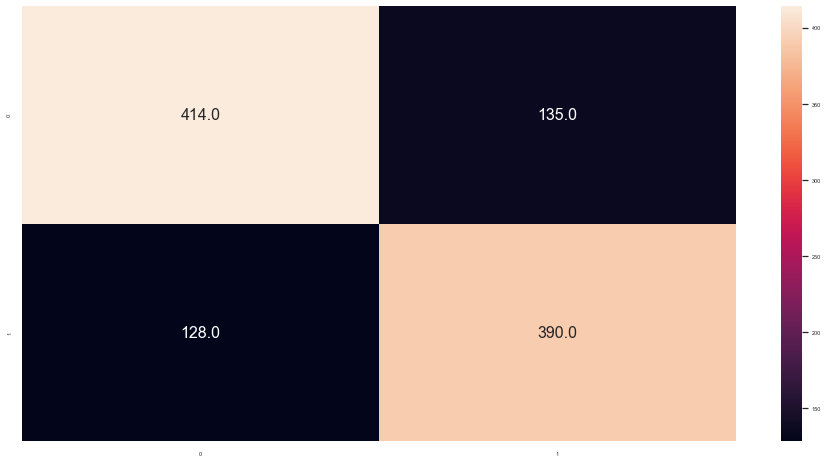

In [12]:
show_validation_metrics(y_test, prediction)